## Seaborn for visualization

These examples pulled from the [Seaborn documentation](http://seaborn.pydata.org/)

> Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

> Seaborn aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

---
### Install Seaborn

Seaborn isn't shipped automatically with the Anaconda Python distribution.

If you try `import seaborn as sns` and get an error, you need to install the seaborn module. The exclamation point makes it a bash shell command (rather than Python), and the `--yes` makes it so that you automatically confirm the installation rather than having to answer the `y/[n]` question as you would normally in the terminal.

```bash
!conda install seaborn --yes
```


In [1]:
import seaborn as sns

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
!conda install seaborn --yes

Fetching package metadata .........
Solving package specifications: ..........

Package plan for installation in environment /opt/conda:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    expat-2.1.0                |                0         365 KB
    libxcb-1.12                |                1         1.5 MB
    dbus-1.10.10               |                0         2.4 MB
    gstreamer-1.8.0            |                0         2.6 MB
    gst-plugins-base-1.8.0     |                0         3.1 MB
    pandas-0.19.2              |      np111py35_1        16.7 MB
    qt-5.6.2                   |                2        44.2 MB
    statsmodels-0.6.1          |      np111py35_1         5.2 MB
    pyqt-5.6.0                 |           py35_1         5.5 MB
    matplotlib-1.5.3           |      np111py35_1         8.4 MB
    seaborn-0.7.1              |           py35_0         281 KB
   

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [2]:
# Load some data sets built right into Seaborn

iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")
attend = sns.load_dataset("attention").query("subject <= 12")

## Pairplot

Not very flexible, but a fast way to see a summary of your variables

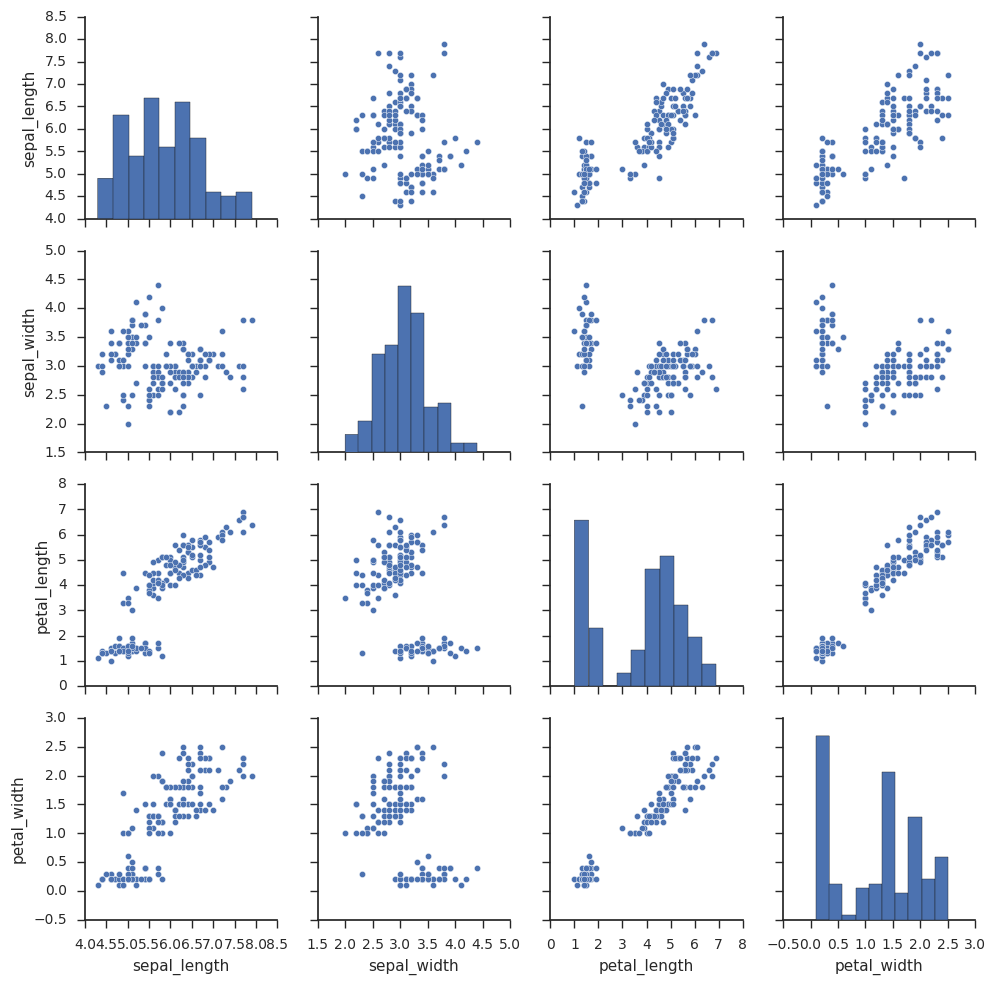

In [4]:
g = sns.pairplot(iris)

## PairGrid

> First you initialize the grid, then you pass plotting function to a map method and it will be called on each subplot.

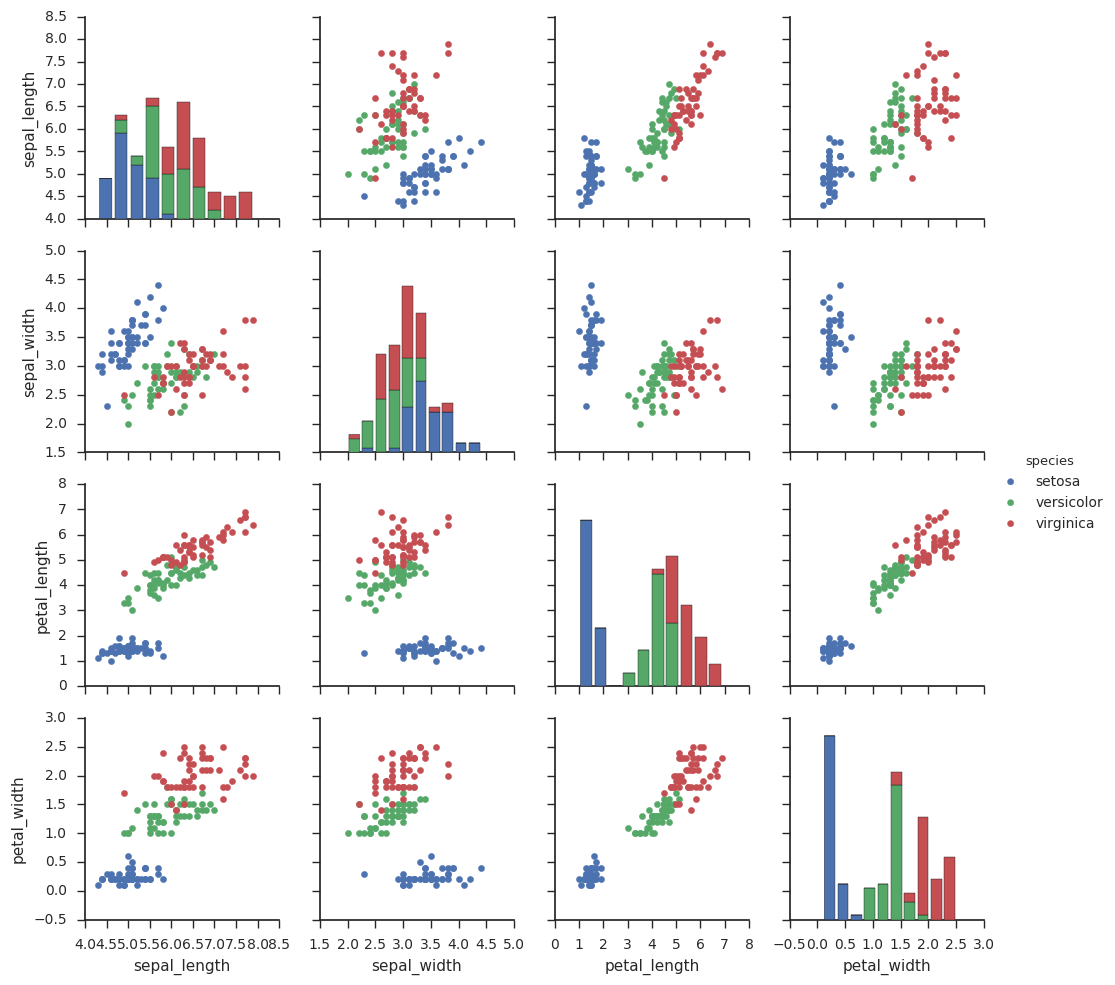

In [5]:
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

## FacetGrid

Lets you separate plots by categories, while still mapping various plotting functions onto each

From: [Plotting on Data Aware Grids](http://seaborn.pydata.org/tutorial/axis_grids.html)

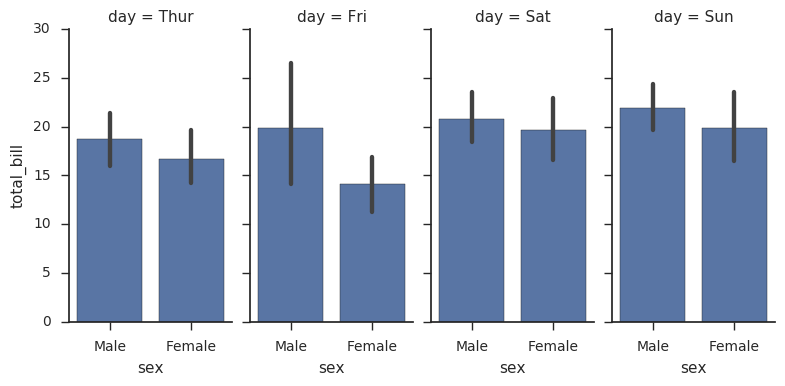

In [8]:
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

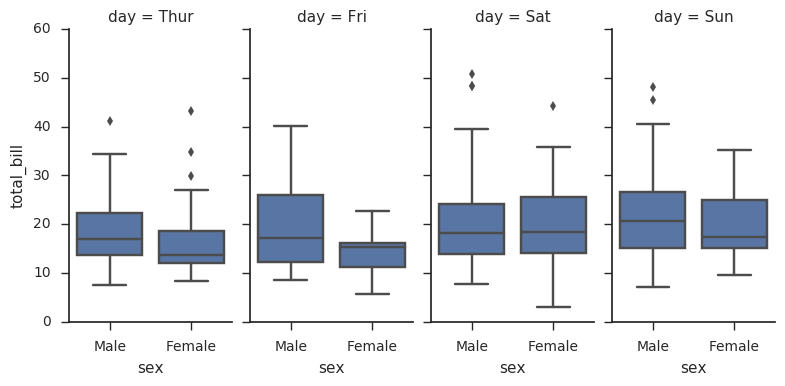

In [9]:
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
g.map(sns.boxplot, "sex", "total_bill");

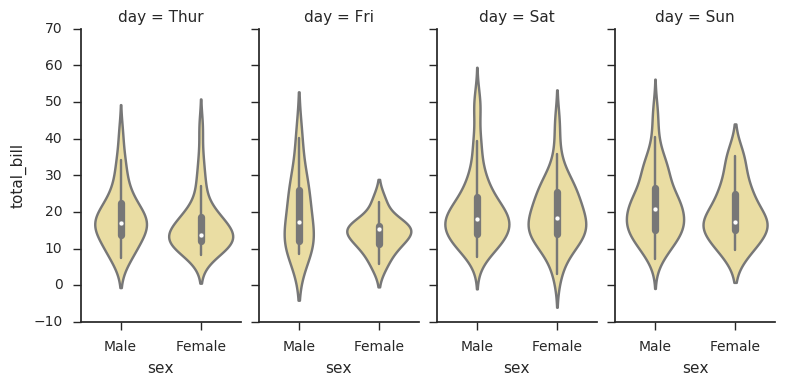

In [19]:
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
g.map(sns.violinplot, "sex", "total_bill", color='#F6E497');

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


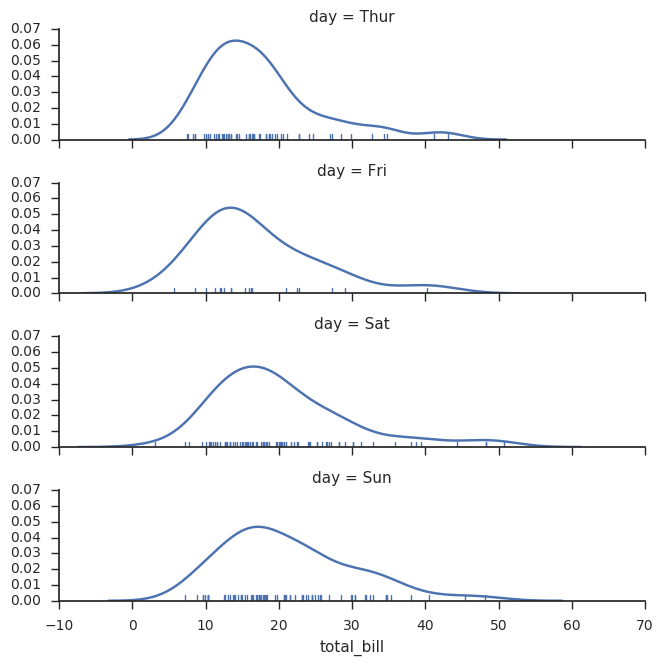

In [12]:
g = sns.FacetGrid(tips, row="day", size=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

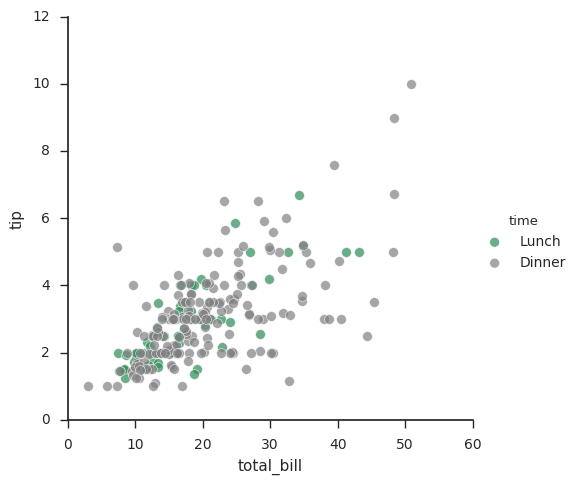

In [3]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, size=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

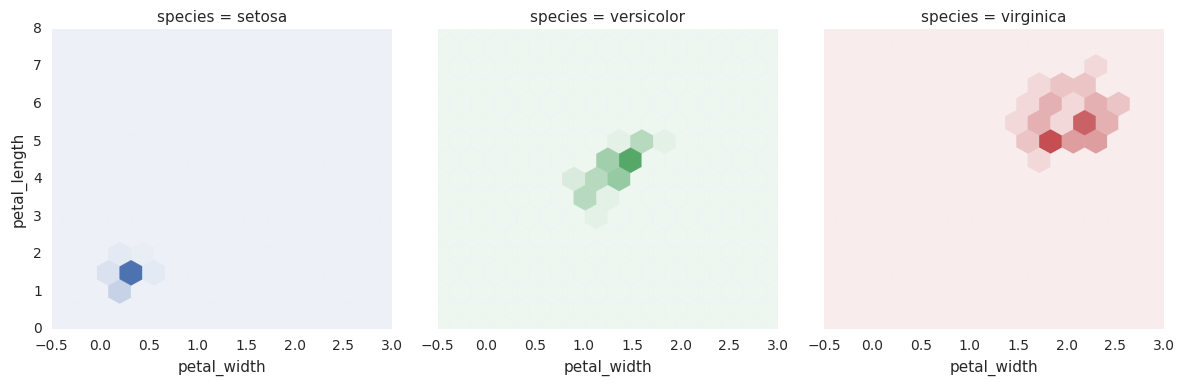

In [6]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(iris, hue="species", col="species", size=4)
    
g.map(hexbin, "petal_width", "petal_length", extent=[-0.5, 3, 0, 8]);

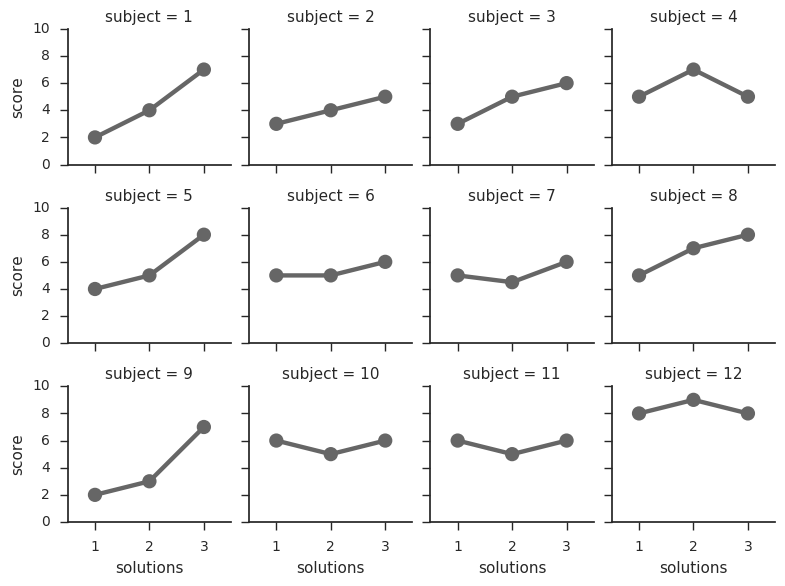

In [7]:
g = sns.FacetGrid(attend, col="subject", col_wrap=4, size=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".4", ci=None);